# DATA STORYTELLING (UPDATED)

Note: I've updated my dataset to the latest one provided by Toronto Police including data from 2019.
<p>The dataset explored in this project is the KSI - Killed or Seriously Injured data from the Toronto Police Service. This data provides details on the serious incident occurring in the city over the span of 11 years from 2008 to 2019. After carrying out the data wrangling process, we will now be exploring the data for analysis and observable trends.</p>

In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium import plugins
import ipywidgets
import geocoder
import geopy

In [2]:
#import the data file for KSI - Killed or Seriously Injured from the Toronto Police Service webstie
data = pd.read_csv('ksidataupdated.csv', index_col = 0)

## EXPLORING THE DATA

### I. BY YEAR/MONTH/DAY OF THE WEEK/TIME

First we will have a look at the data of the accidents by the time of occurrence to determine if there is a specific year/month/day of the week/time where serious incident are more likely to occur.

#### BY YEAR

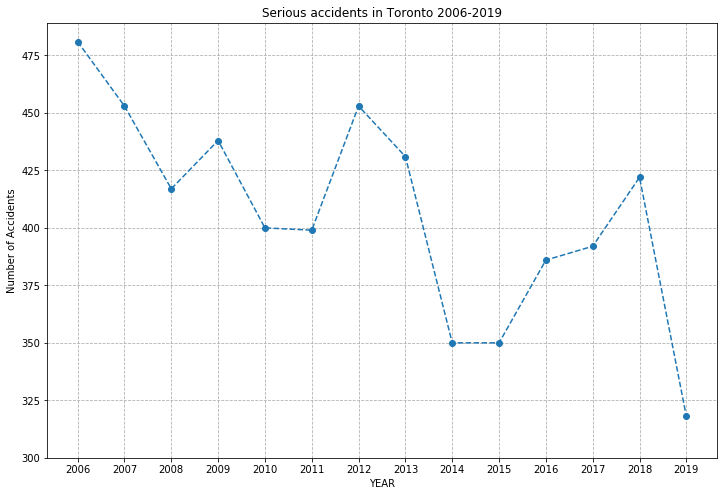

In [6]:
#Find no. of accident by year, use of the drop duplicates function since some accidents are are recorded more than once
data.index = pd.to_datetime(data.index)
trend = data[['ACCNUM']].drop_duplicates()
yeartrend = trend.groupby([trend.index.year]).count()
fig, ax = plt.subplots(figsize=(12,8))
fig = plt.plot(yeartrend.index.values, yeartrend.ACCNUM, marker = 'o', linestyle='--')
plt.xlabel('YEAR'), plt.ylabel('Number of Accidents'), plt.xticks(yeartrend.index.values)
plt.ylim(bottom=300), plt.grid(True, linestyle = '--')
plt.title('Serious accidents in Toronto 2006-2019')
plt.show()

From the graph above, we can see there is a general decline in the number of serious accidents happening in Toronto in the past 7 years (from 2013 to 2019) compared to from 2006 to 2013. The biggest drops are from the period from 2013 and 2014 and the period from 2018 to 2019 where we can see a big decline in the number of serious accidents.

#### BY MONTH

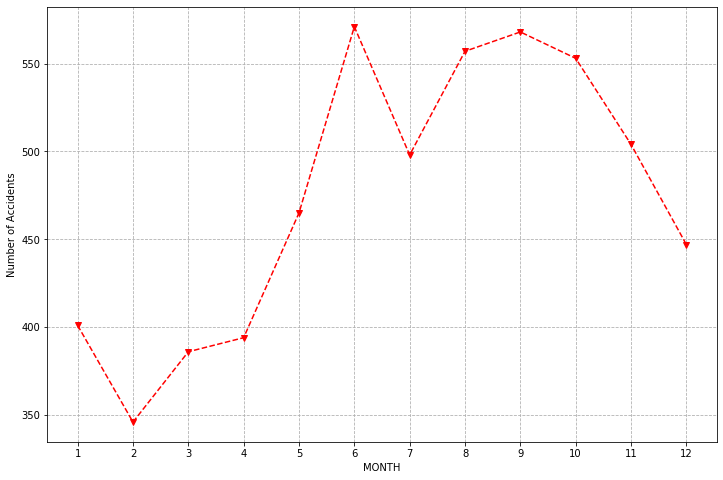

In [8]:
#Find no. of accident by year, use of the drop duplicates function since some accidents are are recorded more than once
monthtrend = trend.groupby([trend.index.month]).count()
fig, ax = plt.subplots(figsize=(12,8))
fig = plt.plot(monthtrend.index.values, monthtrend.ACCNUM, marker = 'v', linestyle='--', color='r')
plt.xlabel('MONTH'), plt.ylabel('Number of Accidents')
plt.grid(True, linestyle = '--'), plt.xticks(monthtrend.index.values)
plt.show()

We can see from the graph that there is a very low number of traffic accidents happening from December until April in Toronto, which are also winter months in Toronto where the temperature is lowest with a lot of snow days. This seems to correspond to the fact that people stay in more during winter, hence there are less number of accidents.

#### BY DAY OF THE WEEK

In [9]:
#Finding the day of the week of occurrences
trend2 = trend.copy()
trend2.index = trend2.index.dayofweek
#Create a data count table by day of the week
daytrend = trend2.groupby(trend2.index).count()
days = {0:'MON',1:'TUE',2:'WED',3:'THUR',4:'FRI',5:'SAT',6:'SUN'}
daytrend.index=daytrend.index.map(days)

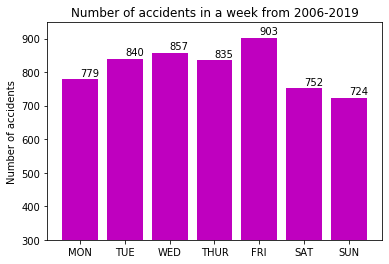

In [15]:
plt.bar(daytrend.index.values, daytrend.ACCNUM, color='m')
plt.title('Number of accidents in a week from 2006-2019')
plt.ylabel('Number of accidents')
plt.ylim(bottom = 300)
xlocs=plt.xticks()
for i, v in enumerate(daytrend.ACCNUM):
    plt.text(s= str(v), x = i, y=v+10)
plt.show()

From the bar chart above, we can see that there is a higher number of serious accidents on Friday. Assuming that it's the last day of the week so people tend to go out more at night, we can have a look at the data of those accidents happening on Friday only and see what time it usually occurred. 

#### LOOKING AT ACCIDENTS HAPPENING ON FRIDAY

In [22]:
#Finding the location of the accidents on Friday
y = list(trend2.loc[4]['ACCNUM'])
fridayaccident =data.loc[data['ACCNUM'].isin(y)]
fridayloc=fridayaccident[['ACCNUM', 'LONGITUDE', 'LATITUDE']].drop_duplicates()

In [23]:
map3=folium.Map(location=[43.708,-79.33], zoom_start=11, height=500, width=900, control_scale=True)
fridayloc.apply(lambda row:folium.CircleMarker(location=[row["LATITUDE"], row["LONGITUDE"]], radius=0.8).add_to(map3), axis=1)
map3

By looking at the map above, we can see a large number of accidents happening in the downtown area on Friday, which corresponds to party night for many people.

In [29]:
drunkFRI = fridayaccident.loc[fridayaccident.ALCOHOL=='Yes']
#Finding the location of the accidents on Friday
drunkFRI=drunkFRI[['ACCNUM', 'LONGITUDE', 'LATITUDE']].drop_duplicates()
map4=folium.Map(location=[43.708,-79.33], zoom_start=11, height=500, width=900, control_scale=True)
drunkFRI.apply(lambda row:folium.CircleMarker(location=[row["LATITUDE"], row["LONGITUDE"]], radius=0.8).add_to(map4), axis=1)
map4

We try to see where accident involving drunk people are located in the city and it appears like they are not necessarily in the downtown area alone but they are spread out around the city.

### BY LOCATION

In [31]:
#Count the number of accident in different Neighbourhoods
nbrank = data[['ACCNUM','Neighbourhood']].drop_duplicates().groupby(['Neighbourhood']).count().sort_values('ACCNUM', ascending=False)
nbrank.nlargest(5, 'ACCNUM')

ACCNUM
Neighbourhood                                 
Waterfront Communities-The Island (77)     205
West Humber-Clairville (1)                 166
Bay Street Corridor (76)                   134
Rouge (131)                                129
Woburn (137)                               116

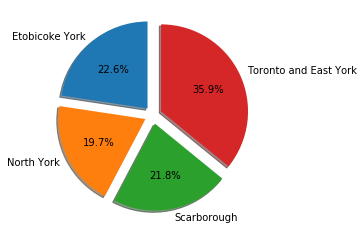

In [32]:
#Count the number of accident in different District
districtaccident = data[['ACCNUM','District']].drop_duplicates().groupby(['District']).count()
explode = (0.1, 0.1, 0.1, 0.1)
plt.pie(districtaccident.ACCNUM, explode = explode, labels=districtaccident.index.values, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.show()

The highest number of accidents happening in Toronto and East York seems to coincide with the neighbourhood of Waterfront Communities-The Island (77) as this neighbourhood is located in this district.

### MAPPING IN ACCIDENTS BASED ON LATITUDE AND LONGITUDE

In [33]:
#Create a dataframe for the accident's latitude and longitude
mapdata = data[['ACCNUM', 'LATITUDE', 'LONGITUDE']].drop_duplicates()
mapdata

ACCNUM   LATITUDE  LONGITUDE
2006-01-01 02:36:00      893184  43.699595 -79.318797
2006-01-01 03:15:00      909646  43.684874 -79.316188
2006-01-02 07:05:00      884090  43.652892 -79.406253
2006-01-04 19:40:00      885782  43.655145 -79.433590
2006-01-06 22:10:00      882079  43.777056 -79.347858
...                         ...        ...        ...
2019-12-23 06:57:00  9002468442  43.678390 -79.464794
2019-12-23 14:15:00  9002471073  43.660304 -79.517086
2019-12-25 08:50:00  9002481518  43.775104 -79.347011
2019-12-27 23:24:00  9002496688  43.752475 -79.516483
2019-12-28 15:14:00  9002500260  43.658504 -79.384868

[5690 rows x 3 columns]

In [34]:
#Pinpointing the accidents in the map
map1=folium.Map(location=[43.708,-79.33], zoom_start=11, height=500, width=900, control_scale=True)
mapdata.apply(lambda row:folium.CircleMarker(location=[row["LATITUDE"], row["LONGITUDE"]], radius=0.8).add_to(map1), axis=1)
map1

The map above shows that our finding is quite accurate in terms of the location of the accidents, a lot of them occurred in the waterfront area of Toronto (strong cluster of accidents over the year)

### ROADCLASS WHERE ACCIDENTS ARE MOST LIKELY TO OCCUR

In [96]:
#Count the number of different ROAD_CLASS
data_road = data[['ACCNUM','ROAD_CLASS']].drop_duplicates().groupby(['ROAD_CLASS']).count().reset_index()
data_road = pd.DataFrame(data_road)
data_road = data_road.set_index('ROAD_CLASS')
data_road = data_road.rename(columns = {'ACCNUM': "Total accidents"})
data_road

Total accidents
ROAD_CLASS                          
Collector                        354
Expressway                         6
Laneway                            4
Local                            289
Major Arterial                  3981
Major Arterial Ramp                1
Minor Arterial                   931
Unknown/Other                    124

The Table shows that a large portion of the accidents happened in major arterials, which are defined by the City of Toronto as roads involving over 20,000 of daily motor vehicle traffic volume with higher speed limits than other roadclass but less speed limits than expressway.

Now we will have a look at how fatal the accidents that happened in the these different road class:

In [97]:
data1 = data[['ACCNUM', 'INJURY', 'ROAD_CLASS']]
data1 = data1.drop_duplicates()
table1 = data1.groupby('ROAD_CLASS').INJURY.value_counts().unstack().reset_index()
table1 = pd.DataFrame(table1, columns=['Fatal', 'ROAD_CLASS'])
table1 = table1.set_index('ROAD_CLASS')
table1= table1.replace(np.nan, 0 )
table1

Fatal
ROAD_CLASS                
Collector             49.0
Expressway             1.0
Laneway                3.0
Local                 44.0
Major Arterial       538.0
Major Arterial Ramp    0.0
Minor Arterial       107.0
Unknown/Other         24.0

In [100]:
result = pd.concat([data_road,table1], axis=1)
result

Total accidents  Fatal
ROAD_CLASS                                 
Collector                        354   49.0
Expressway                         6    1.0
Laneway                            4    3.0
Local                            289   44.0
Major Arterial                  3981  538.0
Major Arterial Ramp                1    0.0
Minor Arterial                   931  107.0
Unknown/Other                    124   24.0

In [102]:
#Create a table showing the rate of Fatal Accident by ROAD_CLASS
result['Rate of Fatal Accidents'] = result['Fatal']/result['Total accidents']
result

Total accidents  Fatal  Rate of Fatal Accidents
ROAD_CLASS                                                          
Collector                        354   49.0                 0.138418
Expressway                         6    1.0                 0.166667
Laneway                            4    3.0                 0.750000
Local                            289   44.0                 0.152249
Major Arterial                  3981  538.0                 0.135142
Major Arterial Ramp                1    0.0                 0.000000
Minor Arterial                   931  107.0                 0.114930
Unknown/Other                    124   24.0                 0.193548

Without looking at the rate of Fatal accidents for Unknown and Laneway, we can see that accidents happening on Expressway tend to be more fatal (0.166666) than major arterial (0.135) even though there are more accident happening on major arterial roads. A possible explanation for this could be the fact that people tend to drive faster on Expressway making it more fatal when collision occurs.

### LOOKING AT LOCATIONS WITH HIGH FREQUENCY OF ACCIDENTS

In [39]:
#Dropping Vehicle Owner from the data
data = data[data['INVTYPE']!='Vehicle Owner']
#Count the number of different addresses where accident occurred
addressgroup = data[['ACCNUM','ADDRESS']].drop_duplicates().groupby(['ADDRESS']).count()
#grouping addresses with high number of incident, more than 4
k = list(addressgroup.loc[addressgroup.ACCNUM>=5].index)
highaccident = data.loc[data['ADDRESS'].isin(k)]
#Count the number of addresses with higher frequency of accidents
highaccident['ACCNUM'].drop_duplicates().count()

451

In [40]:
#Most likely impacts seen in highaccident roads
highaccident[['ACCNUM','IMPACTYPE']].drop_duplicates().groupby(['IMPACTYPE']).count()

ACCNUM
IMPACTYPE                     
Angle                       41
Approaching                 10
Cyclist Collisions          28
Other                        7
Pedestrian Collisions      205
Rear End                    32
SMV Other                   37
SMV Unattended Vehicle       1
Sideswipe                    7
Turning Movement            82

We can see from the table above that the almost half (112 out of 234) of the location with high frequency of accidents are with pedestrian collisions.

In [41]:
#Pinpointing the accidents in the map
map1=folium.Map(location=[43.708,-79.33], zoom_start=11, height=500, width=900, control_scale=True)
highaccident.apply(lambda row:folium.CircleMarker(location=[row["LATITUDE"], row["LONGITUDE"]], radius=3).add_to(map1), axis=1)
map1